#####Created on 24-April-2020 -- By Naganandini Subbaraja#####

### Visualizing the intermediate layer in Deep Learning using simple LeNet

This is a naive attempt to understand the LeNet Architecture, visulaize the intermediate layer, modelling and metrics.

**NOTE1:** LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition. You may find the paper here:
<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank">Paper: <u>Gradient-Based Learning Applied to Document Recognition</u></a>
**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner
**Published in**: Proceedings of the IEEE (1998)

**NOTE2:** The dataset taken here is very small in the context of Deep Learning. 
My intention was NOT to use any standard pre-processed data so that I can comprehend the concepts a little better :)

I have a folder named **dataset_train.** In this I have three different folders (named as gaanu, chubby, dyutith -- Names of children) maintained for 3 different classes which has around 10 images(of children) in each of these folders.

One can surely try with various other datasets, tweak the code a little here and there.... and share the results!!!

In [1]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.0.0
2.3.1


Using TensorFlow backend.


In [2]:
import os,cv2
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from tensorflow.python import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.utils import shuffle
# Visualizing the intermediate layer
from keras import backend as K

In [3]:
path = 'C:/Users/Naganandini/Nandu/DEEP learning/Advanced CNN/LeNet/dataset_train'
data_dir_list = os.listdir(path)

In [5]:
# Define the number of classes
num_classes = 3
labels_name={'gaanu':0,'chubby':1,'dyutith':2}
img_data_list=[]
labels_list = []

In [6]:
for dataset in data_dir_list:
	img_list=os.listdir(path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in img_list:
		input_img=cv2.imread(path + '/'+ dataset + '/'+ img )
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)
		labels_list.append(label)

Loading the images of dataset-chubby

Loading the images of dataset-dyutith

Loading the images of dataset-gaanu



In [7]:
img_data = np.array(img_data_list)
print (img_data.shape)
labels = np.array(labels_list)
labels
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = keras.utils.to_categorical(labels, 3)
print(Y)

(36, 128, 128, 3)


In [11]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)
# Normalization
#x_train = x_train.astype('float32') --> dont use this... if used then need to change the datatype again to ndarray
#x_test = x_test.astype('float32') --> dont use this as accuracy goes down
x_train = x_train / 255
x_test = x_test / 255

In [12]:
# Defining the input shape for the model
input_shape=img_data[0].shape
input_shape

(128, 128, 3)

In [13]:
# Defining the model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 6)       456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 13456)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1614840   
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [14]:
# Training
num_epoch=200
hist = model.fit(x_train, y_train, batch_size=32, epochs= num_epoch, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)

Train on 28 samples, validate on 8 samples
Epoch 1/200
28/28 [==============================] - 1s 27ms/step - loss: 1.1388 - accuracy: 0.3214 - val_loss: 4.9799 - val_accuracy: 0.2500
Epoch 2/200
28/28 [==============================] - 0s 17ms/step - loss: 3.8699 - accuracy: 0.3929 - val_loss: 3.5291 - val_accuracy: 0.2500
Epoch 3/200
28/28 [==============================] - 0s 17ms/step - loss: 2.5705 - accuracy: 0.3929 - val_loss: 1.6804 - val_accuracy: 0.2500
Epoch 4/200
28/28 [==============================] - 0s 16ms/step - loss: 1.0486 - accuracy: 0.4286 - val_loss: 0.8310 - val_accuracy: 0.6250
Epoch 5/200
28/28 [==============================] - 0s 17ms/step - loss: 0.7369 - accuracy: 0.5714 - val_loss: 1.2203 - val_accuracy: 0.3750
Epoch 6/200
28/28 [==============================] - 0s 15ms/step - loss: 0.9711 - accuracy: 0.6071 - val_loss: 0.8093 - val_accuracy: 0.5000
Epoch 7/200
28/28 [==============================] - 0s 16ms/step - loss: 0.5485 - accuracy: 0.7857 - val

28/28 [==============================] - 0s 15ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.4424 - val_accuracy: 0.6250
Epoch 59/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.4433 - val_accuracy: 0.6250
Epoch 60/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.4442 - val_accuracy: 0.6250
Epoch 61/200
28/28 [==============================] - 1s 18ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.4453 - val_accuracy: 0.6250
Epoch 62/200
28/28 [==============================] - 0s 18ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.4467 - val_accuracy: 0.6250
Epoch 63/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.4484 - val_accuracy: 0.6250
Epoch 64/200
28/28 [==============================] - 0s 18ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.4504 - val_accuracy: 0.6250
Epoch 65/200

Epoch 116/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5767 - val_accuracy: 0.6250
Epoch 117/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5786 - val_accuracy: 0.6250
Epoch 118/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5804 - val_accuracy: 0.6250
Epoch 119/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5822 - val_accuracy: 0.6250
Epoch 120/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5839 - val_accuracy: 0.6250
Epoch 121/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.5857 - val_accuracy: 0.6250
Epoch 122/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.5874 - val_accuracy:

Epoch 173/200
28/28 [==============================] - 1s 18ms/step - loss: 9.8788e-04 - accuracy: 1.0000 - val_loss: 1.6616 - val_accuracy: 0.6250
Epoch 174/200
28/28 [==============================] - 1s 19ms/step - loss: 9.8153e-04 - accuracy: 1.0000 - val_loss: 1.6628 - val_accuracy: 0.6250
Epoch 175/200
28/28 [==============================] - 0s 17ms/step - loss: 9.7525e-04 - accuracy: 1.0000 - val_loss: 1.6641 - val_accuracy: 0.6250
Epoch 176/200
28/28 [==============================] - 1s 20ms/step - loss: 9.6905e-04 - accuracy: 1.0000 - val_loss: 1.6654 - val_accuracy: 0.6250
Epoch 177/200
28/28 [==============================] - 0s 16ms/step - loss: 9.6290e-04 - accuracy: 1.0000 - val_loss: 1.6667 - val_accuracy: 0.6250
Epoch 178/200
28/28 [==============================] - 0s 16ms/step - loss: 9.5682e-04 - accuracy: 1.0000 - val_loss: 1.6680 - val_accuracy: 0.6250
Epoch 179/200
28/28 [==============================] - 0s 17ms/step - loss: 9.5081e-04 - accuracy: 1.0000 - val_

In [78]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.694645881652832
Test accuracy: 0.625


In [15]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

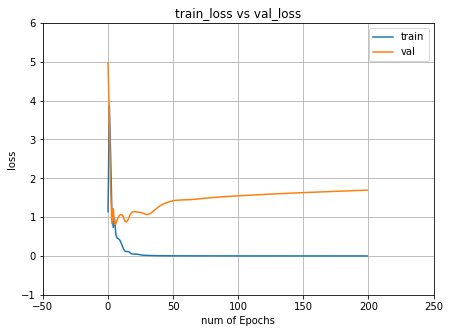

In [16]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

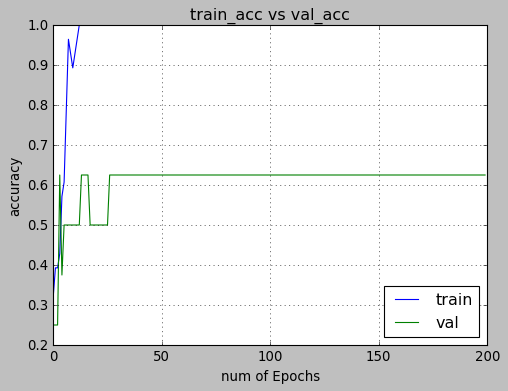

In [17]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [18]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.694645881652832
Test accuracy: 0.625


In [19]:
test_image = x_test[0:1]
print (test_image.shape)

(1, 128, 128, 3)


In [20]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

[[9.9571228e-01 3.5681417e-03 7.1960682e-04]]
[0]
[[1. 0. 0.]]


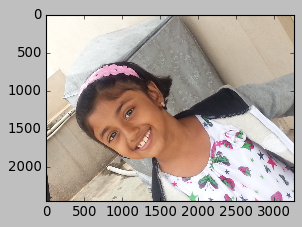

In [77]:
#Displaying the image to be predicted!!!
#!pip install pillow
import matplotlib.image as mpimg
fig=plt.figure(figsize=(4,4))
test_image = mpimg.imread("C:/Users/Naganandini/Nandu/DEEP learning/Advanced CNN/LeNet/my_test_data/gaanu.jpg")
plt.imshow(test_image)
plt.show()

In [42]:
# Normalize the test image
test_image = cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32') # This is mandatory for test data!!
test_image /= 255
print (test_image.shape)

(128, 128, 3)


In [43]:
test_image= np.expand_dims(test_image, axis=0)
print (test_image.shape)

(1, 128, 128, 3)


In [44]:
# Predicting the test image
print((model.predict(test_image)))
print(model.predict_classes(test_image))

[[9.9896884e-01 1.0202840e-03 1.0838435e-05]]
[0]


**Great!!! The prediction says class 0. Therefore the class is 'gaanu' which is correct!!!**

### Now, let us Visualize the intermediate layer


In [47]:
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=1
filter_num=1

activations = get_featuremaps(model, int(layer_num),test_image)

In [54]:
print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))
print (feature_maps.shape)

(1, 1, 62, 62, 6)
(62, 62, 6)
(62, 62, 6)


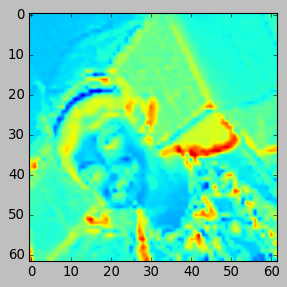

In [71]:
fig=plt.figure(figsize=(4,4))
plt.imshow(feature_maps[:,:,filter_num]) #,cmap='gray'
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.png')
#eps, pdf, pgf, png, ps, raw, rgba, svg, svgz

**Now observe that some of the dominant features are seen... fairly we can recognise the face structure, eyepits, skin area**

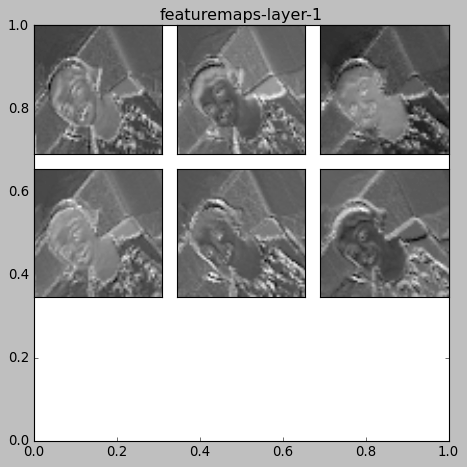

In [61]:
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(6,6))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.png')

**Here, I have taken the grayscale so we can visulise the image better!**

**In every new section, model is learning different features in different kernels!!**

In [74]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(gaanu)', 'class 1(chubby)', 'class 2(Dyutith)']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[9.9571228e-01 3.5681347e-03 7.1960612e-04]
 [5.1521477e-03 9.9413115e-01 7.1671768e-04]
 [4.4397883e-02 8.9149815e-01 6.4103931e-02]
 [7.4152792e-01 1.1271381e-01 1.4575829e-01]
 [4.3106377e-03 9.9359494e-01 2.0944176e-03]
 [8.7894714e-01 3.1824529e-02 8.9228354e-02]
 [2.0503570e-04 8.3366653e-04 9.9896133e-01]
 [9.2143466e-04 9.9365026e-01 5.4283133e-03]]
[0 1 1 0 1 0 2 1]
                  precision    recall  f1-score   support

  class 0(gaanu)       0.67      0.50      0.57         4
 class 1(chubby)       0.50      1.00      0.67         2
class 2(Dyutith)       1.00      0.50      0.67         2

        accuracy                           0.62         8
       macro avg       0.72      0.67      0.63         8
    weighted avg       0.71      0.62      0.62         8

[[2 2 0]
 [0 2 0]
 [1 0 1]]


Confusion matrix, without normalization
[[2 2 0]
 [0 2 0]
 [1 0 1]]


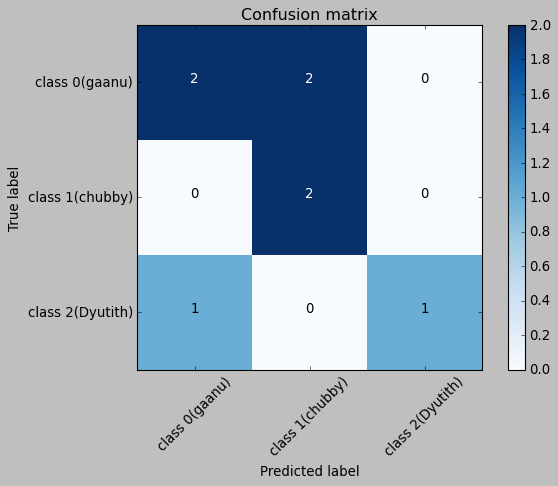

In [75]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [76]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk
Loaded model from disk
